### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# drop column cause not useful
df_train.drop("Loan_ID", axis=1, inplace=True)
df_test.drop("Loan_ID", axis=1, inplace=True)

### Missing Values

In [6]:
df_train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

### Replace missing values with the most frequent value

In [7]:
cols_null = ["Credit_History", "Self_Employed", "LoanAmount", 
            "Dependents", "Loan_Amount_Term", "Gender", "Married"]

for x in cols_null:
    df_train[x] = df_train[x].fillna(df_train[x].
    dropna().mode().values[0])

In [8]:
num = df_train.select_dtypes("number").columns.to_list()
ctg = df_train.select_dtypes("object").columns.to_list()

loan_num = df_train[num]
loan_ctg = df_train[ctg]

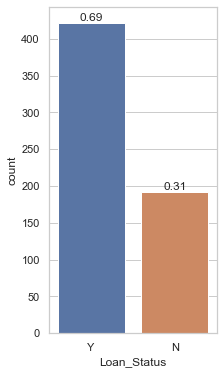

In [9]:
tot = float(len(df_train[ctg[-1]]))
plt.figure(figsize=(3,6))
sns.set(style = "whitegrid")
a = sns.countplot(df_train[ctg[-1]])

for y in a.patches:
    h = y.get_height()
    a.text(y.get_x()+y.get_width()/2.,h + 
    3,"{:1.2f}".format(h/tot),ha="center") 
plt.show()


### Plot data

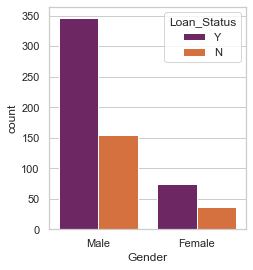

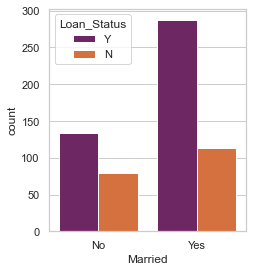

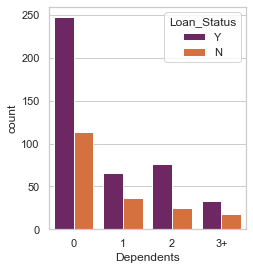

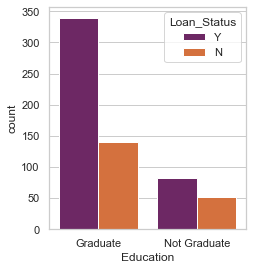

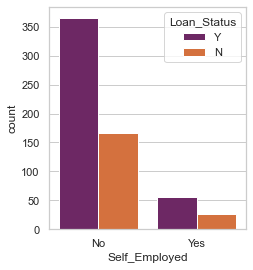

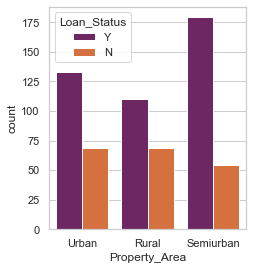

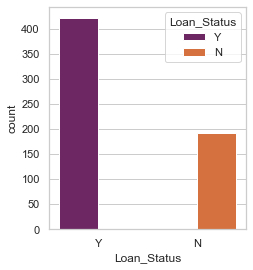

In [10]:
for x in loan_ctg:
    plt.figure(figsize=(12,9))
    plt.subplot(2,3,1)
    sns.countplot(x=x, hue="Loan_Status", data=df_train, palette="inferno")
    plt.xlabel(x, fontsize=12)

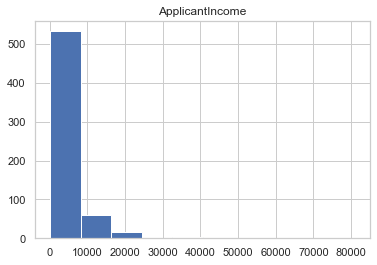

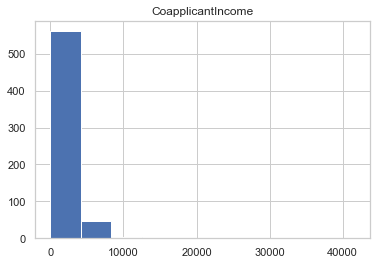

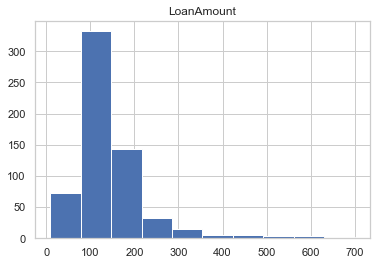

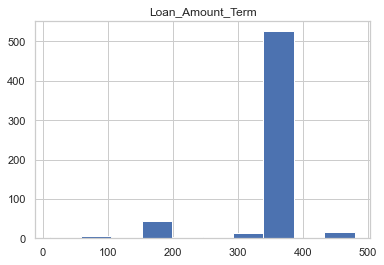

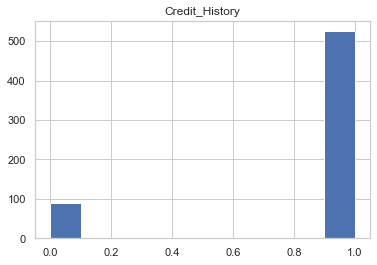

In [11]:
for x in loan_num:
    plt.hist(loan_num[x])
    plt.title(x)
    plt.show()

### Encoding data to numeric

In [12]:
to_num = {"Male": 0, "Female": 1,
"Yes": 1, "No": 0,
"Graduate": 1, "Not Graduate": 0,
"Urban": 2, "Semiurban": 1,"Rural": 0,
"Y": 1, "N": 0,
"3+": 3}

df_train = df_train.applymap(lambda l: to_num.get(l) if l in to_num else l)
df_test = df_test.applymap(lambda l: to_num.get(l) if l in to_num else l)

d1 = pd.to_numeric(df_train.Dependents)
d2 = pd.to_numeric(df_test.Dependents)

df_train.drop(["Dependents"], axis = 1, inplace = True)
df_test.drop(["Dependents"], axis = 1, inplace = True)

df_train = pd.concat([df_train, d1], axis = 1)
df_test = pd.concat([df_test, d2], axis = 1)

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None


### Correlation matrices

<AxesSubplot:>

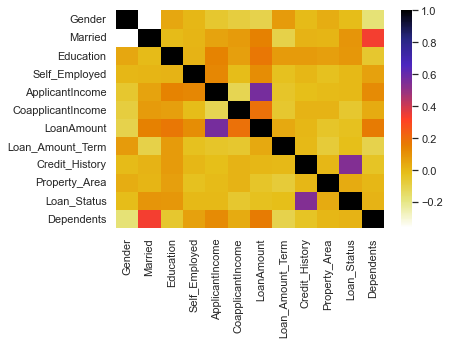

In [13]:
sns.heatmap(df_train.corr(), cmap="CMRmap_r")

In [14]:
c = df_train.corr()
c.style.background_gradient(cmap='BuPu').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,-0.36,0.05,0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,-0.36,1.00,-0.01,0.00,0.05,0.08,0.15,-0.10,0.01,0.00,0.09,0.33
Education,0.05,-0.01,1.00,0.01,0.14,0.06,0.17,0.07,0.07,0.07,0.09,-0.06
Self_Employed,0.00,0.00,0.01,1.00,0.13,-0.02,0.11,-0.03,-0.00,-0.03,-0.00,0.06
ApplicantIncome,-0.06,0.05,0.14,0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,0.08,0.06,-0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,0.15,0.17,0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,-0.10,0.07,-0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,0.01,0.07,-0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,0.00,0.07,-0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


## Machine Learning Models

In [15]:
x = df_train.drop("Loan_Status", axis = 1)
y = df_train["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Decision Trees

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_predict = dt.predict(x_test)
print(classification_report(y_test, y_predict))

dt_score = accuracy_score(y_predict, y_test)
print(f"{round(dt_score*100,2)}% accuracy")

              precision    recall  f1-score   support

           0       0.48      0.51      0.50        51
           1       0.81      0.79      0.80       134

    accuracy                           0.71       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.72      0.71      0.72       185

71.35% accuracy


### Logistic Regression

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
print(classification_report(y_test, y_predict))

lr_score = accuracy_score(y_predict, y_test)
print(f"{round(lr_score*100,2)}% accuracy")

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185

83.24% accuracy


### Random Forest

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
print(classification_report(y_test, y_predict))

rf_score = accuracy_score(y_predict, y_test)
print(f"{round(rf_score*100,2)}% accuracy")

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        51
           1       0.81      0.93      0.87       134

    accuracy                           0.79       185
   macro avg       0.75      0.67      0.69       185
weighted avg       0.78      0.79      0.77       185

78.92% accuracy


### XGBoost

In [19]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_predict = xgb.predict(x_test)
print(classification_report(y_test, y_predict))

xgb_score = accuracy_score(y_predict, y_test)
print(f"{round(xgb_score*100,2)}% accuracy")

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% accuracy


## Conclusion

a. Credit_History has high correlation with Loan_Status so it's a very importan variable for our calculations

b. The Logistic Regression algorithm is the most accurate out of the ones I tested with 83% accuracy!

In [20]:
score = [dt_score, lr_score, rf_score, xgb_score]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree", "Logistic Regression", "Random Forest", "XGBoost"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
1,Logistic Regression,0.832432
3,XGBoost,0.794595
2,Random Forest,0.789189
0,Decision Tree,0.713514
